In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.metrics import r2_score
import pickle

In [2]:
prefix = 'plot'
tuneby = 'year'
inPATH = 'results/ml_pred_' + prefix + '_cv_year_tuneby_' + tuneby + '.csv'
with open('results/ml_train_' + prefix + '_cv_year_tuneby_' + tuneby + '_results.pk', 'rb') as f:
    mod_dict = pickle.load(f)
df_bm_pred = pd.read_csv(inPATH)
df_bm_pred['Source'] = pd.Categorical(df_bm_pred['Source'], 
                                      categories=['LASSO', 'PLS', 'PCR', 'SVR', 'RF', 'GBR'])

save_results = False

In [3]:
def r2_corrcoef(y_obs, y_pred):
    corr_matrix = np.corrcoef(y_obs, y_pred)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    return R_sq

In [4]:
df_bm_pred['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
if 'Transect' in df_bm_pred.columns:
    mae_transect = df_bm_pred.groupby(['Source', 'Year']).apply(
        lambda z: z.groupby(['Pasture', 'Plot', 'Transect', 'Date_mean']).apply(
            lambda x: abs(np.mean(x['Predicted']) - np.mean(x['Observed']))).mean()).round(2)
    mape_transect = df_bm_pred.groupby(['Source', 'Year']).apply(
        lambda z: z.groupby(['Pasture', 'Plot', 'Transect', 'Date_mean']).apply(
            lambda x: abs(np.mean(x['Predicted']) - np.mean(x['Observed'])) / np.mean(x['Observed'])).mean()).round(2)
    r2_transect = df_bm_pred.groupby(['Source', 'Year']).apply((lambda x: r2_score(x['Observed'], x['Predicted']))).round(2)
    r2_corr_transect = df_bm_pred.groupby(['Source', 'Year']).apply((lambda x: r2_corrcoef(x['Observed'], x['Predicted']))).round(2)

In [ ]:
if 'Transect' in df_bm_pred.columns:
    df_smry_transect = pd.DataFrame({
        'MAE': mae_transect.unstack(level=0).mean().round(2),
        'MAPE': mape_transect.unstack(level=0).mean().round(2),
        'R^2': r2_transect.unstack(level=0).mean().round(2),
        'r^2': r2_corr_transect.unstack(level=0).mean().round(2)
    })
    display(df_smry_transect)
    if save_results:
        df_smry_transect.to_csv('results/tables/ml_models/ml_yrly_pred_transect_from_' + prefix + '_tuneby_' + tuneby + '.csv')

    df_smry_transect_by_yr = pd.DataFrame({
        'MAE': mae_transect.round(2),
        'MAPE': mape_transect.round(2),
        'R^2': r2_transect.round(2),
        'r^2': r2_corr_transect.round(2)
    })
    #display(df_smry_plot_by_yr)
    if save_results:
        df_smry_transect_by_yr.to_csv('results/tables/ml_models/ml_yrly_pred_transect_from_' + prefix + '_tuneby_' + tuneby + '_yearly.csv')

In [ ]:
mae_plot = df_bm_pred.groupby(['Source', 'Year']).apply(
    lambda z: z.groupby(['Pasture', 'Plot', 'Date_mean']).apply(lambda x: abs(np.mean(x['Predicted']) - np.mean(x['Observed']))).mean()).round(2)
mape_plot = df_bm_pred.groupby(['Source', 'Year']).apply(
    lambda z: z.groupby(['Pasture', 'Plot', 'Date_mean']).apply(lambda x: abs(np.mean(x['Predicted']) - np.mean(x['Observed'])) / np.mean(x['Observed'])).mean()).round(2)
r2_plot = df_bm_pred.groupby(['Source', 'Year', 'Pasture', 'Plot']).mean().reset_index().dropna().groupby(['Source', 'Year']).apply(
    (lambda x: r2_score(x['Observed'], x['Predicted']))).round(2)
r2_corr_plot = df_bm_pred.groupby(['Source', 'Year', 'Pasture', 'Plot']).mean().reset_index().dropna().groupby(['Source', 'Year']).apply(
        lambda x: r2_corrcoef(x['Observed'], x['Predicted'])).round(2)

In [ ]:
df_smry_plot = pd.DataFrame({
    'MAE': mae_plot.unstack(level=0).mean().round(2),
    'MAPE': mape_plot.unstack(level=0).mean().round(2),
    'R^2': r2_plot.unstack(level=0).mean().round(2),
    'r^2': r2_corr_plot.unstack(level=0).mean().round(2)
})
display(df_smry_plot)
if save_results:
    df_smry_plot.to_csv('results/tables/ml_models/ml_yrly_pred_plot_from_' + prefix + '_tuneby_' + tuneby + '.csv')

df_smry_plot_by_yr = pd.DataFrame({
    'MAE': mae_plot.round(2),
    'MAPE': mape_plot.round(2),
    'R^2': r2_plot.round(2),
    'r^2': r2_corr_plot.round(2)
})
#display(df_smry_plot_by_yr)
if save_results:
    df_smry_plot_by_yr.to_csv('results/tables/ml_models/ml_yrly_pred_plot_from_' + prefix + '_tuneby_' + tuneby + '_yearly.csv')

In [ ]:
mae_pasture = df_bm_pred.groupby(['Source', 'Year']).apply(
    lambda z: z.groupby(['Pasture', 'Date_mean']).apply(lambda x: abs(np.mean(x['Predicted']) - np.mean(x['Observed']))).mean()).round(2)
mape_pasture = df_bm_pred.groupby(['Source', 'Year']).apply(
    lambda z: z.groupby(['Pasture', 'Date_mean']).apply(lambda x: abs(np.mean(x['Predicted']) - np.mean(x['Observed'])) / np.mean(x['Observed'])).mean()).round(2)
r2_pasture = df_bm_pred.groupby(['Source', 'Year', 'Pasture']).mean().reset_index().dropna().groupby(['Source', 'Year']).apply(
    lambda x: r2_score(x['Observed'], x['Predicted'])).round(2)
r2_corr_pasture = df_bm_pred.groupby(['Source', 'Year', 'Pasture']).mean().reset_index().dropna().groupby(['Source', 'Year']).apply(
    lambda x: r2_corrcoef(x['Observed'], x['Predicted'])).round(2)

In [ ]:
df_smry_pasture = pd.DataFrame({
    'MAE': mae_pasture.unstack(level=0).mean().round(2),
    'MAPE': mape_pasture.unstack(level=0).mean().round(2),
    'R^2': r2_pasture.unstack(level=0).mean().round(2),
    'r^2': r2_corr_pasture.unstack(level=0).mean().round(2)
})
display(df_smry_pasture)
if save_results:
    df_smry_pasture.to_csv('results/tables/ml_models/ml_yrly_pred_pasture_from_' + prefix + '_tuneby_' + tuneby + '.csv')

df_smry_pasture_by_yr = pd.DataFrame({
    'MAE': mae_pasture.round(2),
    'MAPE': mape_pasture.round(2),
    'R^2': r2_pasture.round(2),
    'r^2': r2_corr_pasture.round(2)
})
#display(df_smry_pasture_by_yr)
if save_results:
    df_smry_pasture_by_yr.to_csv('results/tables/ml_models/ml_yrly_pred_pasture_from_' + prefix + '_tuneby_' + tuneby + '_yearly.csv')

In [ ]:
if 'Transect' in df_bm_pred.columns:
    p_trans = sns.lmplot(df_bm_pred, x='Observed', y='Predicted', col='Source', col_wrap=3, hue='Year', ci=None,
                         scatter_kws={'s': 8, 'alpha': 0.25, 'edgecolor': None})
    for ax in p_trans.axes:
        ax.set_ylim((0, 4000))
        ax.plot(np.arange(0, 4000), np.arange(0, 4000), c='black')
    if save_results:
        plt.savefig(os.path.join('results/figures/ml_models', 'ml_yrly_pred_transect_from_' + prefix + '_tuneby_' + tuneby + '.png'), dpi=100)
else:
    p_trans=None

In [ ]:
p_plot = sns.lmplot(df_bm_pred.groupby(['Year', 'Source', 'Pasture', 'Plot', 'Date_mean']).mean().reset_index(),
               x='Observed', y='Predicted', col='Source', col_wrap=3, col_order=['LASSO', 'PLS', 'PCR', 'RF', 'SVR', 'GBR'],
               hue='Year', ci=None,
                    scatter_kws={'s': 8, 'alpha': 0.25, 'edgecolor': None})
for ax in p_plot.axes:
        ax.set_ylim((0, 4000))
        ax.plot(np.arange(0, 4000), np.arange(0, 4000), c='black')
if save_results:
    plt.savefig(os.path.join('results/figures/ml_models', 'ml_yrly_pred_plot_from_' + prefix + '_tuneby_' + tuneby + '.png'), dpi=100)

In [ ]:
p_pasture = sns.lmplot(df_bm_pred.groupby(['Year', 'Source', 'Pasture', 'Date_mean']).mean().reset_index(), 
               x='Observed', y='Predicted', col='Source', col_wrap=3, col_order=['LASSO', 'PLS', 'PCR', 'RF', 'SVR', 'GBR'], 
               hue='Year', ci=None, 
                       scatter_kws={'s': 8, 'alpha': 0.25, 'edgecolor': None})
for ax in p_pasture.axes:
    ax.set_ylim((0, 4000))
    ax.plot(np.arange(0, 4000), np.arange(0, 4000), c='black')
if save_results:
    plt.savefig(os.path.join('results/figures/ml_models', 'ml_yrly_pred_pasture_from_' + prefix + '_tuneby_' + tuneby + '.png'), dpi=100)

In [ ]:
df_lasso_coefs = mod_dict['LASSO']['variable_df']
df_lasso_coefs['Coef_abs'] = abs(df_lasso_coefs['Coef'])
df_lasso_coefs_ranked = df_lasso_coefs.groupby('Variable')['Coef_abs'].mean().sort_values(ascending=False)
df_lasso_coefs['Variable'] = pd.Categorical(df_lasso_coefs['Variable'], categories=df_lasso_coefs_ranked.index.values)
p = sns.catplot(df_lasso_coefs, x='Coef_abs', y='Variable', hue='Year', height=8, aspect=1.0, orient='h')
#for ax in p.axes.flatten():
#    ax.tick_params(axis='x', rotation=90)

In [ ]:
df_lasso_coefs.groupby('Variable')['Coef'].count().sort_values(ascending=False)

In [ ]:
df_lasso_coefs.groupby('Year')['Coef'].count()

In [ ]:
df_vip = mod_dict['PLS']['variable_df']
df_vip_ranked = df_vip.groupby('Variable')['VIP'].mean().sort_values(ascending=False)
df_vip['Variable'] = pd.Categorical(df_vip['Variable'], categories=df_vip_ranked.index.values)
df_vip_top = df_vip[df_vip['VIP'] > 1.0].copy()
df_vip_top['Variable'] = df_vip_top['Variable'].cat.remove_unused_categories()
p = sns.catplot(df_vip_top, x='VIP', y='Variable',  hue='Year', height=8, aspect=1.0, orient='h')

In [ ]:
df_vip[df_vip['VIP'] > 1.0].groupby('Variable')['VIP'].count().sort_values(ascending=False)

In [ ]:
df_pcr_coefs = mod_dict['PCR']['variable_df']
pcr_coefs_abs_mean = df_pcr_coefs.groupby(['Year', 'Variable']).apply(lambda x: np.mean(np.abs(x), axis=1))
pcr_coefs_abs_mean.name = 'Coef_mean_abs'
df_pcr_coefs_mean = pcr_coefs_abs_mean.reset_index()

pcr_vars_mean_ranked = df_pcr_coefs_mean.groupby('Variable')['Coef_mean_abs'].mean().sort_values(ascending=False)
df_pcr_coefs_mean['Variable'] = pd.Categorical(df_pcr_coefs_mean['Variable'], categories=pcr_vars_mean_ranked.index.values)

df_pcr_coefs_mean_top20 = df_pcr_coefs_mean[df_pcr_coefs_mean['Variable'].isin(pcr_vars_mean_ranked.head(20).index.values)].copy()
df_pcr_coefs_mean_top20['Variable'] = df_pcr_coefs_mean_top20['Variable'].cat.remove_unused_categories()

p = sns.catplot(df_pcr_coefs_mean_top20,
                x='Coef_mean_abs', y='Variable',  hue='Year', height=6, aspect=1, orient='h')

In [ ]:
df_svr_pi = mod_dict['SVR']['variable_df']
df_svr_pi_ranked = df_svr_pi.groupby('Variable')['PI'].mean().sort_values(ascending=False)
df_svr_pi['Variable'] = pd.Categorical(df_svr_pi['Variable'], categories=df_svr_pi_ranked.index.values)
p = sns.catplot(df_svr_pi,
                x='PI', y='Variable',  hue='Year', height=6, aspect=1, orient='h')

In [ ]:
df_rf_pi = mod_dict['RF']['variable_df']
df_rf_pi_ranked = df_rf_pi.groupby('Variable')['PI'].mean().sort_values(ascending=False)
df_rf_pi['Variable'] = pd.Categorical(df_rf_pi['Variable'], categories=df_rf_pi_ranked.index.values)
p = sns.catplot(df_rf_pi,
                x='PI', y='Variable',  hue='Year', height=6, aspect=1, orient='h')

In [ ]:
df_gbr_pi = mod_dict['GBR']['variable_df']
df_gbr_pi_ranked = df_gbr_pi.groupby('Variable')['PI'].mean().sort_values(ascending=False)
df_gbr_pi['Variable'] = pd.Categorical(df_gbr_pi['Variable'], categories=df_gbr_pi_ranked.index.values)
p = sns.catplot(df_gbr_pi,
                x='PI', y='Variable',  hue='Year', height=6, aspect=1, orient='h')

In [ ]:
p_plot_seas = sns.lmplot(df_bm_pred.groupby(['Year', 'Source', 'Pasture', 'Plot', 'Season']).mean().reset_index(),
               x='Observed', y='Predicted', col='Source', row='Year', col_order=['LASSO', 'PLS', 'PCR', 'RF', 'SVR', 'GBR'],
               hue='Season', ci=None, order=1,
                    scatter_kws={'s': 8, 'alpha': 0.25, 'edgecolor': None})
for ax in p_plot_seas.axes.flatten():
        ax.set_ylim((0, 4000))
        ax.plot(np.arange(0, 4000), np.arange(0, 4000), c='black')

In [5]:
param_dfs = {}
for k in mod_dict:
    for idx, yr in enumerate(mod_dict[k]['tune_results']):
        if idx == 0:
            param_names = list(np.unique([list(x.keys()) for x in mod_dict[k]['tune_results'][yr]['params']]))
            param_dfs[k] = pd.DataFrame(columns=['Model', 'Year', 'Best', 'MAPE', 'MSE', 'R2', 'R2_train'] + param_names)
        df_tmp = pd.DataFrame({'Model': k,
                               'Year': yr,
                               'Best': 0,
                               'MAPE': mod_dict[k]['tune_results'][yr]['mean_test_MAPE'],
                               'MSE': mod_dict[k]['tune_results'][yr]['mean_test_MSE'],
                               'R2': mod_dict[k]['tune_results'][yr]['mean_test_R2'],
                               'R2_train': mod_dict[k]['tune_results'][yr]['mean_train_R2']})
        for p in param_names:
            df_tmp[p] = mod_dict[k]['tune_results'][yr]['param_' + p].data
        idx_best = mod_dict[k]['tune_results'][yr]['rank_test_MAPE'].argmin()
        df_tmp.loc[idx_best, 'Best'] = 1
        param_dfs[k] = pd.concat([param_dfs[k], df_tmp])

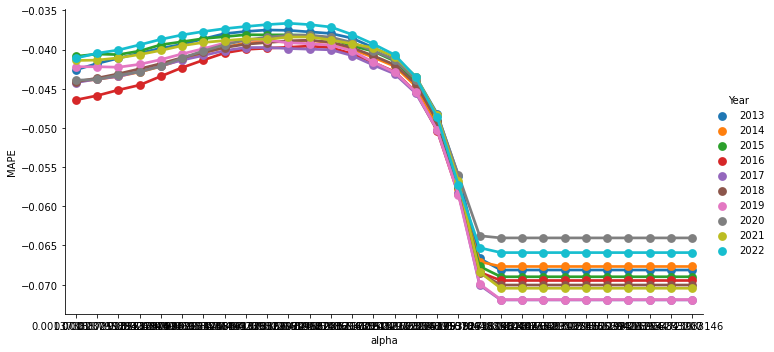

In [6]:
sns.catplot(x='alpha', y='MAPE', data=param_dfs['LASSO'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='n_components', y='MAPE', data=param_dfs['PLS'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='pca__n_components', y='MAPE', data=param_dfs['PCR'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='min_samples_split', y='MAPE', data=param_dfs['RF'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='max_samples', y='MAPE', data=param_dfs['RF'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='n_estimators', y='MAPE', data=param_dfs['RF'], hue='Year', kind='point', aspect=2)

In [ ]:
param_dfs['RF']['max_features'][param_dfs['RF']['max_features'].isnull()] = 'None'
sns.catplot(x='max_features', y='MAPE', data=param_dfs['RF'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='gamma', y='MAPE', data=param_dfs['SVR'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='C', y='MAPE', data=param_dfs['SVR'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='max_depth', y='MAPE', data=param_dfs['GBR'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='learning_rate', y='MAPE', data=param_dfs['GBR'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='min_child_weight', y='MAPE', data=param_dfs['GBR'], hue='Year', kind='point', aspect=2)

In [ ]:
sns.catplot(x='n_estimators', y='MAPE', data=param_dfs['GBR'], hue='Year', kind='point', aspect=2)